In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Dataset

test  train  validation


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import ImageDataGenerator from tensorflow.keras instead of just keras

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
import pandas as pd

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 20 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 2)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6500 - loss: 0.6773 - val_accuracy: 0.5000 - val_loss: 0.8347
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - accuracy: 0.5000 - loss: 0.7518 - val_accuracy: 0.4500 - val_loss: 0.8034


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          30,753 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,949 (370.90 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,300 (247.27 KB)

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Dataset/validation/MB_or_VD_01.jpeg',
                            target_size = (64, 64))
#test_image = tf.keras.utils.load_img(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Mahesh Babu'
else:
  prediction = 'Vijay Devarakonda'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
print(prediction)

Vijay Devarakonda


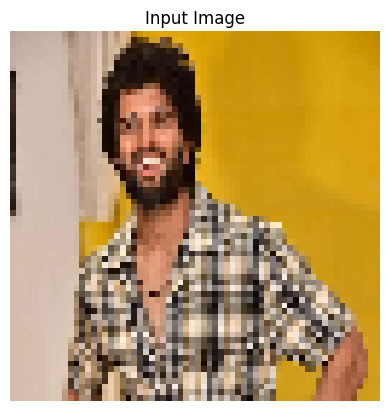

In [ ]:
import matplotlib.pyplot as plt

# Squeeze the test_image to remove the batch dimension
plt.imshow(test_image.squeeze())
plt.axis('off')  # Hide axes
plt.title('Input Image')
plt.show()